# Исследование закономерностей, определяющих успешность игр на глобальном рынке

**Описание проекта**

В рамках проекта проводится исследование глобального рынка компьютерных игр в контексте достижения бизнес-задач для интернет-магазина «Стримчик». 

Основа исследования - открытые исторические данные о региональных продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В нашем распоряжении данные до 2016 года.

*Цель проекта*: выявить определяющие успешность игры закономерности и проверить ряд гипотез, нацеленных на эффективное планирование рекламных кампаний и повышение конкурентосопособности бизнеса на рынке компьютерных игр.

**Описание исходных данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цели исследования**
1. Изучить следующие характеристики компьютерных игр: 
* Базовые: название, платформа, год выпуска, жанр игры;
* Оценочные: оценка критиков, оценка пользователей, рейтинг от ESRB;
* Объемы региональных продаж.
2. Произвести предобработку данных: корректировка типов данных, наименований столбцов, устранение пропусков, дубликатов, выбивающихся значений.
3. Добавить в датафрейм столбец, содержащий информацию о суммарных продажах по каждому региону.
4. Изучить, визуализировать и описать особенности для следующих параметров:
* количество игр, выпускаемых за разные годы;
* количество продаж игр, выпускаемых на разных платформах;
* перечень платформ-лидеров по количеству игровых релизов и их прибыльности;
* объем глобальных продаж в актуальном периоде по топ-5 платформам;
* влияние оценок критиков и пользователей на продажи в разрезе одной платформы и сравнение со статистикой по топ-5 платформам;
* распределение релизов игр по жанрам в контексте их прибыльности за актуальный период.
5. Сформировать портрет типичного пользователя компьютерных игр для следующих региональных рынков: Северная Америка, Европа, Япония.
6. Провести проверку следующих гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
* Средние пользовательские рейтинги жанров Action и Sports разные?
7. Подготовить итоговые выводы исследования.

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Cоздаем датафрейм с данными об играх
data = pd.read_csv('/datasets/games.csv')

In [3]:
#Получаем базовую информацию о датафрейме
display(data.head(10), data.tail(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Количество пропусков по столбцам
display(data.isna().sum().sort_values(ascending = False))

#Рассчитаем долю пропусков в процентах по столбцам
pd.DataFrame(data.isna().mean()*100,).style.background_gradient('coolwarm')

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

,0
Name,0.011965
Platform,0.000000
Year_of_Release,1.609333
Genre,0.011965
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.319174
User_Score,40.089740


Что видим? В 6 из 11 столбцов есть пропущенные значения, а именно:
- Столбец 'Name'  (0.02% пропусков)
- Столбец 'Year_of_Release'  (1.61% пропусков)
- Столбец 'Genre'  (0.02% пропусков)
- Столбец 'Critic_Score'  (51.32% пропусков)
- Столбец 'User_Score'  (40.09% пропусков)
- Столбец 'Rating'  (40.48% пропусков)

In [5]:
# Количество явных дубликатов
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [6]:
# Проверка на неявные дубликаты по ключевой связке - название, платформа и год выпуска игры
data[['Name', 'Platform', 'Year_of_Release']].value_counts().head(15)

Name                        Platform  Year_of_Release
Madden NFL 13               PS3       2012.0             2
 Beyblade Burst             3DS       2016.0             1
Ratatouille                 PC        2007.0             1
Rapala Tournament Fishing!  X360      2006.0             1
Rapala Trophies             PSP       2006.0             1
Rapala for Kinect           X360      2011.0             1
Rapala's Fishing Frenzy     Wii       2008.0             1
Rapala: We Fish             Wii       2009.0             1
Rapid Reload                PS        1995.0             1
Rare Replay                 XOne      2015.0             1
Rascal                      PS        1998.0             1
Rat Attack!                 N64       2000.0             1
                            PS        1999.0             1
Ratatouille                 DS        2007.0             1
                            GBA       2007.0             1
dtype: int64

In [7]:
#Проверим корректность заголовков датафрейма
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Первичные итоги ознакомления с данными:**

1. Датафрейм содержит информацию по 16715 компьютерным играм, каждая из которых описывается 11 признаками (6 количественных, 4 категориальных и 1 временной).
2. Все наименования столбцов имеют корректный вид и пригодны для дальнейшей работы. Однако есть смысл переименовать столбцы в соответствии со стилем snake_case (приведение к строчному регистру).
3. Обнаружены ошибки в типах данных по следующим столбцам: 
* 'Year_of_Release', 'Critic_Score' - тип данных должен быть целочисленным (int64);
* 'User_Score' - тип данных должен быть вещественным (float64).
3. У 6 из 11 признаков имеются пропущенные значения. Значительная доля пропусков наблюдается в столбцах, связанных с оценкой компьютерных игр: 'Critic_Score' (51.32% пропусков), 'User_Score' (40.09% пропусков), 'Rating' (40.48% пропусков). Причины появления пропусков будут рассмотрены точечно на этапе предобработки данных.
5. Обнаружен неявный дубликат по игре 'Madden NFL 13', явных дубликатов не выявлено.

## Предобработка данных

Займемся переименованием столбцов, устранением неявных дубликатов, анализом пропусков и последующей корректировкой типов данных в соответствии с определенными рекомендациями.

In [8]:
# приведем названия столбцов к "змеиному" стилю
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#Проверим строку с дубликатом по игре 'Madden NFL 13'

data.loc[
    ((data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012))
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Из полученной таблицы видим, что в строке 604 содержится более полная информация по продажам игр в европейском регионе и других странах. Поэтому есть смысл устранить дубликат по строке 16230 для учета в анализе наиболее релевантных данных.

In [10]:
# Удаляем строку-дубликат № 16230
data = data.loc[data.index != 16230]

# Контрольная проверка по неявным дубликатам
data[['name', 'platform', 'year_of_release']].value_counts().head(15)

name                        platform  year_of_release
 Beyblade Burst             3DS       2016.0             1
Reactor                     2600      1981.0             1
Rapala Tournament Fishing!  Wii       2006.0             1
                            X360      2006.0             1
Rapala Trophies             PSP       2006.0             1
Rapala for Kinect           X360      2011.0             1
Rapala's Fishing Frenzy     Wii       2008.0             1
Rapala: We Fish             Wii       2009.0             1
Rapid Reload                PS        1995.0             1
Rare Replay                 XOne      2015.0             1
Rascal                      PS        1998.0             1
Rat Attack!                 N64       2000.0             1
                            PS        1999.0             1
Ratatouille                 DS        2007.0             1
                            GBA       2007.0             1
dtype: int64

**1) name - название игры**

Доля пропусков по названию игр составляет **0.02%** от объема датафрейма.

In [11]:
# Проверим строки с пропусками
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что в выведенных строках, помимо пропусков в названиях игр, отсутствуют также наименование платформы, жанр, оценка критиков, оценка пользователей и рейтинг от организации ESRB. Соответственно, такие строки будут малоинформативны в дальнейшем анализе. Предлагаю удалить их.

In [12]:
#Удаляем пропуски в названиях игр
data = data.dropna(subset = ['name'])
print('Пропущенных значений по названиям игр:', data['name'].isna().sum())

Пропущенных значений по названиям игр: 0


**2) year_of_release - год выпуска**

Доля пропусков по году выпуска игр составляет **1.61%** от объема датафрейма. Поскольку данные о годе невозможно заполнить медианным или другим расчетным значением, а доля пропущенных данных не велика, предлагаю удалить эти строки.

Причиной пропусков в столбце по году выпуска может являться как техническая ошибка по выгрузке данных, так и невыход игры в продажу на момент сбора данных об игровом продукте. Последняя версия находит свое подтверждение в случае сопадения пропусков по следующим столбцам: год выпуска, оценка критиков, оценка пользователей, рейтинг ассоциации ESRB.

In [13]:
# Удаляем пропуски в годе выпуска игр
data = data.dropna(subset = ['year_of_release'])

# Изменим тип данных на 'целочисленный'
data['year_of_release'] = data['year_of_release'].astype('int')

**3) genre - жанр игры**

In [14]:
# Проверим количество оставшихся пропусков после проведенной выше обработки данных
print('Пропущенных значений по жанру игр:', data['genre'].isna().sum())

Пропущенных значений по жанру игр: 0


**4) critic_score - оценка критиков**

Пропущенных значений по оценке критиков составляет больше половины датафрейма (**51.32%**). Поэтому предлагаю ввести условный маркер **-1** для сохранения объема данных и учета в дальнейшем анализе.

In [15]:
# Заполняем пропуски условным маркером '-1', меняем тип данных на целочисленным (int64);
data['critic_score'] = data['critic_score'].fillna(-1).astype('int')

# Контрольная проверка
print('Пропущенных значений по оценке критиков:', data['critic_score'].isna().sum())
print(data['critic_score'].unique())

Пропущенных значений по оценке критиков: 0
[76 -1 82 80 89 58 87 91 61 97 95 77 88 83 94 93 85 86 98 96 90 84 73 74
 78 92 71 72 68 62 49 67 81 66 56 79 70 59 64 75 60 63 69 50 25 42 44 55
 48 57 29 47 65 54 20 53 37 38 33 52 30 32 43 45 51 40 46 39 34 41 36 31
 27 35 26 19 28 23 24 21 17 13]


**5) User_score - оценка пользователей**

Пропущенных значений по оценке пользователей составляет **40.1%**. Рассмотрим этот параметр подробнее.

In [16]:
# Проверим корректность набора уникальных значений в столбце 'user_score'
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В перечне значений видим аббревиатуру 'tbd' (to be determined). Данное сокращение используется в случае, если значение еще не определено, например, в случае недостатка отзывов для выставления оценки. Для учета строк с данным значением заменим 'tbd' на NaN. Пропуски с учетом преобразованного 'tbd' предлагаю заменить условным маркером **-1**, чтобы не смешивать с реальными данными.

In [17]:
# Заменяем значения 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NAN)

# Заполняем пропуски условным маркером '-1', меняем тип данных на вещественный (float64)
data['user_score'] = data['user_score'].fillna(-1).astype('float')

#Контрольная проверка
print('Количество \'tbd\' в столбце \'user_score\':', len(data.query('user_score == "tbd"')))
print('Пропущенных значений по оценке пользователей:', data['user_score'].isna().sum())
print(data['user_score'].unique())

Количество 'tbd' в столбце 'user_score': 0
Пропущенных значений по оценке пользователей: 0
[ 8.  -1.   8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
  5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7  2.2
  2.   9.5  2.1  3.6  2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1  0.3
  1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7]


**6) Rating - рейтинг от организации ESRB**

В соответствии с информацией из открытых источников рейтинг компьютерных игр определяется негосударственной ассоциацией Entertainment Software Rating Board (ESRB), основное направление деятельности которой — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного ПО *в США и Канаде*. (Википедия, ссылка: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

Оценка игры содержит буквенное обозначение рейтинга, присвоенного игре со стороны ESRB (всего 8 уникальных значений). Расшифровка *буквенных обозначений рейтинга*:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» (до 1998 года - "K-A" ("Kids to Adults"))
- «E10+»(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M»(«Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

В других странах существуют свои системы стандартизации и лицензирования видеоигр (например, как PEGI в Европейском Союзе, CERA в Японии). 

Можно допустить, что пропуски значений в рейтинге говорят о том, что та или иная игра была создана за пределами США и Канады и не попала под оценку со стороны ESRB. С другой стороны, отсутствие рейтинга может свидетельствовать о неготовности ассоциации ESRB дать однозначную оценку для выпущенной компьютерной игры, либо о её незаинтересованности в этом процессе. 


Доля пропусков по рейтингу от ESRB составляет **40.48%** от объема датафрейма. Считаю верным заменить отсутствующие значения на условный маркер **'unknown'** для сохранения объема данных.

In [18]:
# Предварительно проверим перечень уникальных значений в столбце 'rating' на их соответствие акутальной классификации
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Видим, что в перечне уникальных значениях по этому рейтингу присутствуют не только пропуски, но и устаревшее наименование *'K-A'*, которое необходимо актуализировать через замену на *'E'*.

In [19]:
# Заменяем пропуски в столбце 'rating' на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

# Замена устаревшего значения 'K-A' на 'E' в столбце 'rating'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

# Контрольная проверка перечня уникальных значений в столбце 'rating'
print(data['rating'].unique())
print('Пропущенных значений по рейтингу ESRB:', data['rating'].isna().sum())

['E' 'unknown' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']
Пропущенных значений по рейтингу ESRB: 0


**Расчет общей суммы продаж по регионам**

In [20]:
# Добавим столбец с суммарными продажами по каждому региону
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)

# Корректировка типа данных на вещественный ('float64')
data['total_sales'] = data['total_sales'].astype('float64')

In [21]:
#Контрольная проверка сформированного датафрейма
display(data.head(10), data.tail(10))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63,5.8,unknown,0.01
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,-1,-1.0,T,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,-1,-1.0,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,-1,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,-1,-1.0,unknown,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,-1,-1.0,unknown,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


**Итоги предобработки данных:**

1. Сформирован обновленный датафрейм, содержащий **16443** строк с информацией о компьютерных играх.
2. Заполнены пропуски, изменены типы данных в столбцах, где это возможно технически и логически.
2. Обработаны неявные дубликаты.
3. В столбцах по оценке игровых продуктов (оценка критиков, оценка пользователей, рейтинг ассоциации ESRB) выявлена существенная доля пропущенных значений. В целях сохранения объема данных для дальнейшем анализе введены условные маркеры по указанным столбцам.
4. В качестве причин появления пропусков можно допустить следующие:
* небрежность при вводе данных (все столбцы);
* возникновение технических ошибок при сборе и выгрузке данных (все столбцы);
* невыход игры в продажу на момент сбора сведений об игровом продукте (столбцы: год выпуска, оценка критиков, оценка пользователей, рейтинг ассоциации ESRB);
* недостаточное количество оценок пользователей/критиков для включения игры в общий оценочный рейтинг (оценка критиков, оценка пользователей);
* неготовность лиц, отвечающих за оценку игрового продукта, дать однозначную оценку для выпущенной компьютерной игры (оценка критиков, оценка пользователей, рейтинг ассоциации ESRB);
* неуполномоченность организации на оценку игры по причине региональных особенностей, либо регламентной специфики игровой индустрии (рейтинг ассоциации ESRB).
5. В столбце по рейтингу ассоциации ESRB скорректированы устаревшие обозначения категорий оценки игр.

## Исследовательский анализ данных

### Количество игр, выпускаемых за разные годы

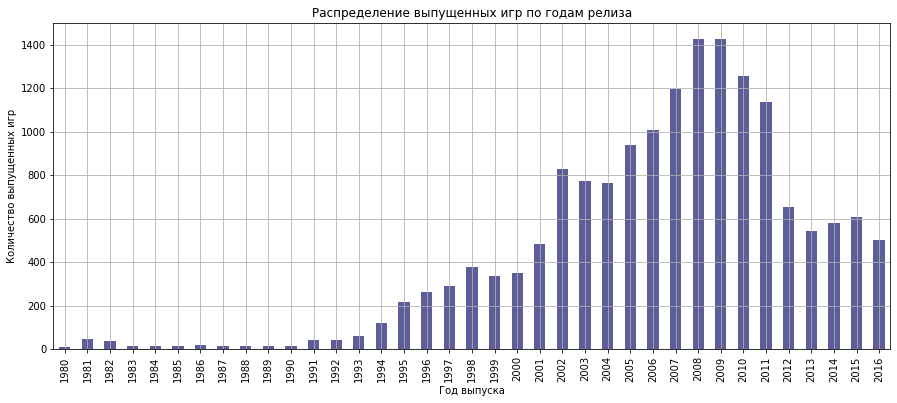

In [23]:
(
    data
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(y='name', kind='bar', title='Распределение выпущенных игр по годам релиза', color='midnightblue', figsize=(15, 6), legend=False, alpha=0.7, grid=True)
)

plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show();

По диаграмме видим, что до 1994 года компьютерные игры выпускались в незначительном количестве (менее 100 игр в год). Начиная с 1994-1995 года (одновременно с выходом приставки PlayStation 1), происходит заметный всплеск в игровой индустрии - ежегодно выпускается порядка 350-390 игр. Следующий пик фиксируется в 2002 год после выхода PlayStation 2 и приставки Xbox.\
**Максимальный пик выпускаемых игр за исследуемый период отмечается в 2008-2009 годы** - более 1400 игр ежегодно. После данного этапа график показывает отрициательную динамику по производству новых игр. Возможной причиной такого поведения может быть развитие индустрии мобильных игр, а также игровых продуктов, развернутых на онлайн платформах.

Так как основные объемы производства компьютерных игр приходятся на период с 1994 года, в дальнейшем исследовании предлагаю рассматривать рынок игр, начиная именно с этого года.

### Количество продаж игр, выпускаемых на разных платформах

Необходимо выбрать платформы с наибольшими суммарными продажами и построить распределение продаж по годам, начиная с 1994 года.

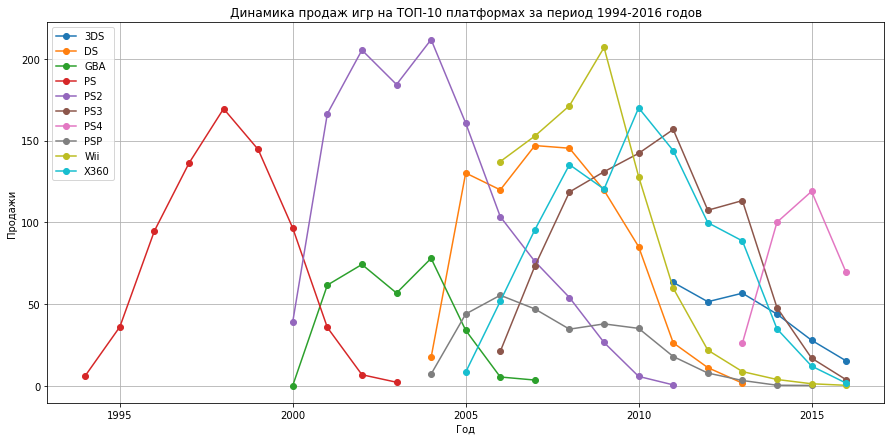

In [24]:
# Найдем топ-10 платформ по объемам продаж игр с 1994 года
platform_sales = data[data['year_of_release'] >=1994].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
#platform_sales

# Создадим список топ-10 платформ по продажам в период 1994-2016 гг.
platform_top10 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

# Строим сводную таблицу топ-10 платформ по объему продажам в зависимости от года

platform_top10_sales = data[(data['platform'].isin(platform_top10)) & (data['year_of_release'] >= 1994)]\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()

# Строим графики продаж в зависимости от года по каждой платформе из ТОП-10
platform_top10_sales.plot(grid = True, figsize = (15, 7), x = 'year_of_release', style = 'o-')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Динамика продаж игр на ТОП-10 платформах за период 1994-2016 годов')
plt.legend(loc = 'upper left')
plt.show()

In [25]:
# Уточним медианное значение жизненного цикла платформы
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
print('Средний срок существования игровой платформы на рынке:', time_life['life'].median())

Средний срок существования игровой платформы на рынке: 7.0


Из графика и проведенных расчетов можно сделать вывод, что в среднем жизненный цикл платформ ограничивается периодом в **7 лет**. Так, например, PS существовала с 1994 до 2003 года (10 лет), PS2 - с 2000 до 2011 года (11 лет), GBA - с 2000 до 2007 года (8 лет), Wii - с 2006 до 2016 года (11 лет). Причиной для ухода старых и появления новых консолей на рынке можно считать технологическое развитие индустрии компьютерных игр с добавлением новых технических требований для той или иной платформы.

### Выделение данных за соответствующий актуальный период

Для продолжения анализа выберем наиболее актуальный период для предсказания развития игровой индустрии в 2017 году.\
Исходя из того, что именно в 2013 году ны рынке повилась наиболее современная платформа PS4, а жизненный цикл других платформ подходил к своему завершению, обозначим **актуальным периодом 2013-2016 гг.**

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Построим ещё один график, отображающий динамику продаж игр в зависимости от платформы по актуальному периоду 2013-2016 гг.

In [26]:
# Определим топ платформ по объемам продаж игр с 2013 года
platform_sales_2013 = data[data['year_of_release'] >=2013].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
display(platform_sales_2013)

# Сделаем срез данных за период 2013-2016 гг.
data_query_2013 = data.query('year_of_release >=2013')

# Создадим список топ-5 платформ по продажам в период 2013-2016 гг.
platform_top5_2013 = ['X360', 'PS3', 'XOne', '3DS', 'PS4']

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


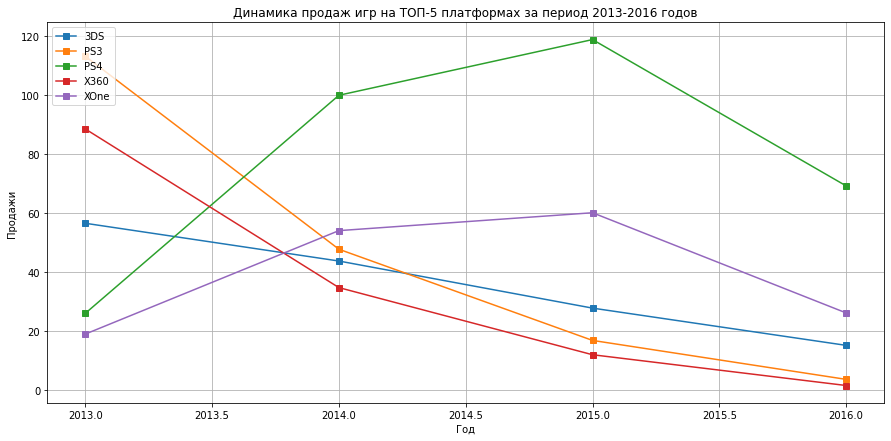

In [27]:
# Строим сводную таблицу топ-5 платформ по объему продажам в зависимости от года
platform_top5_sales = data[(data['platform'].isin(platform_top5_2013)) & (data['year_of_release'] >= 2013)]\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()

# Строим графики продаж в зависимости от года по каждой платформе из топ-5
platform_top5_sales.plot(grid = True, figsize = (15, 7), x = 'year_of_release', style = 's-')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Динамика продаж игр на ТОП-5 платформах за период 2013-2016 годов')
plt.legend(loc = 'upper left')
plt.show()

In [28]:
# Проверим распределение продаж по платформам по состоянию на 2016 год
platform_sales_2016 = data[data['year_of_release'] ==2016].pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
display(platform_sales_2016)

# Проверим распределение суммарных продаж по годам за период 2013-2016 гг
data.query('year_of_release >=2013').groupby('year_of_release')['total_sales'].sum().sort_values(ascending = False)

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


year_of_release
2013    361.24
2014    331.53
2015    267.98
2016    129.94
Name: total_sales, dtype: float64

На основании изученных данных за актуальный период 2013-2016 годов следует обратить внимание на общую для всех платформ тенденцию по сокращению объемов продаж вплоть до 2016 года.

Самыми прибыльными платформами за рассматриваемый период оказались **PS4** (314 млн. продаж), **PS3**(181 млн. продаж) и **XOne**(159 млн. продаж). При этом разрыв в объемах продажах между 1-м и 2-м местом составляет почти 2 раза. Таким образом в прогнозируемом периоде наиболее перспективной платформой остается PS4, сохраняя лидерство на рынке с момента своего появления (с 2013 года).

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

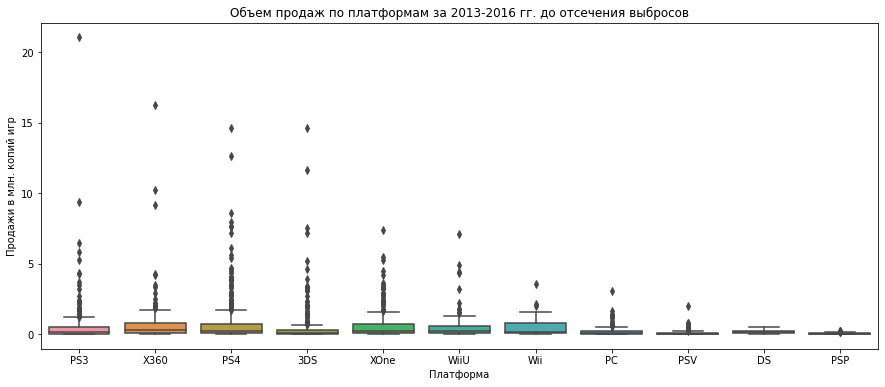

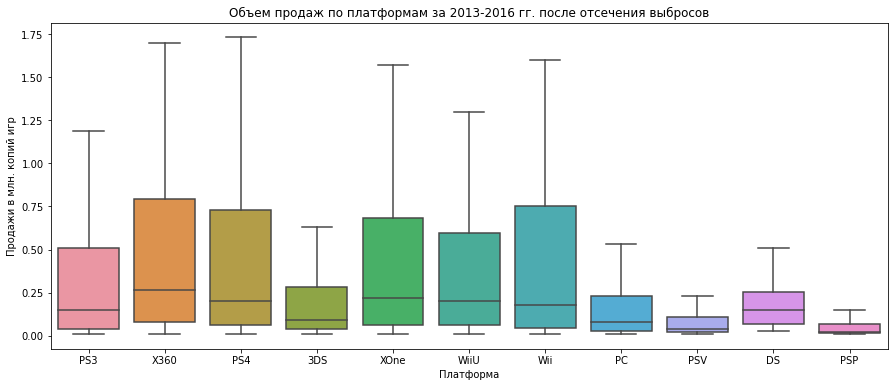

In [29]:
# Построим диаграмму размаха ("ящик с усами") глобальных продаж в разбивке по всем платформам за 2013-2016 гг.

#Ящик с усами до отсечения выбросов
plt.figure(figsize=(15, 6))
sns.boxplot(x=data_query_2013['platform'], y=data_query_2013['total_sales'])
plt.title('Объем продаж по платформам за 2013-2016 гг. до отсечения выбросов')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн. копий игр')
plt.show();

#Ящик с усами после отсечения выбросов
plt.figure(figsize=(15, 6))
sns.boxplot(x=data_query_2013['platform'], y=data_query_2013['total_sales'], showfliers=False)
plt.title('Объем продаж по платформам за 2013-2016 гг. после отсечения выбросов')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн. копий игр')
plt.show();

Построенные диаграммы размаха демонстрируют, что медианные значения глобальных продаж компьютерных игр, собранных в разрезе платформ за период 2013-2016 годов, после отсечения аномальных значений распределяются в диапазоне от 0.05 до 0.25 млн. копий игр.\
Верхняя граница предела, после которой значения попадают в статус выбросов, варьируется следующими образом: для двух наиболее продаваемых платформ - X360, PS4 - на уровне 1.75 млн. проданных копий, для WiiU - на уровне 1.7 млн., для XOne - 1.6 млн., для PS3 - 1.2 млн.

Платформы с самой высокой медианой продаж за рассматриваемый период - X360 и XOne. При этом XOne имеет один из самых больших единичных выбросов в 16 млн. проданных копий игр, уступая по данному критерию только PS3 (единичный выброс в 21 млн.)

Принимая во внимание, что поддержка X360 была прекращена в апреле 2016 года, наиболее **перспективными платформами** с точки зрения дальнейшего развития и привлечения инвестиций в прогнозируемом периоде можно считать **PS4 и XOne**.

### Влияние оценок критиков и пользователей на продажи на отдельно взятой платформе

Для анализа влияния оценок критиков и пользователей на продажи компьютерных игр  в актуальном периоде предлагаю выбрать платформу **PlayStation4** как наиболее перспективную по состоянию на 2016 год. Построим диаграммы рассеяния и посчитаем корреляцию между оценками и продажами.

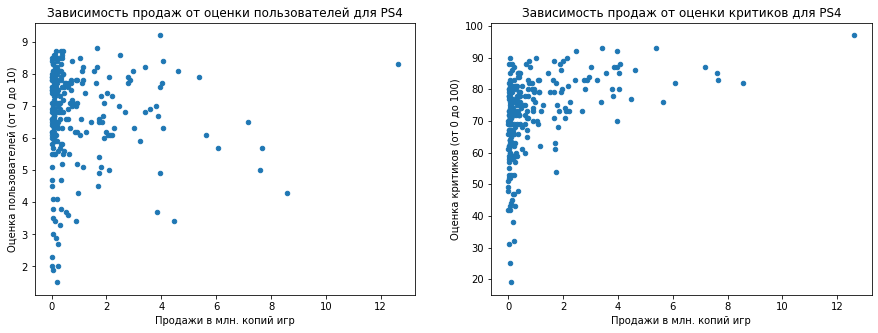

In [31]:
# Строим диаграммы рассеяния для 'PS4' по зависимости продаж от оценки пользователей и критиков за 2013-2016 гг. 
# Убираем из диаграммы условный маркер '-1' в столбцах по оценкам пользователей и критиков

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Зависимость продаж от оценки пользователей
data_ps4_users = data_query_2013.query('platform == "PS4" and (user_score != -1)')
data_ps4_users.plot(kind = 'scatter', x = 'total_sales', y = 'user_score', ax=ax[0])
ax[0].set_title('Зависимость продаж от оценки пользователей для PS4')
ax[0].set_xlabel('Продажи в млн. копий игр')
ax[0].set_ylabel('Оценка пользователей (от 0 до 10)')

# Зависимость продаж от оценки критиков
data_ps4_critics = data_query_2013.query('platform == "PS4" and (critic_score != -1)')
data_ps4_critics.plot(kind = 'scatter', x = 'total_sales', y = 'critic_score', ax=ax[1])
ax[1].set_title('Зависимость продаж от оценки критиков для PS4')
ax[1].set_xlabel('Продажи в млн. копий игр')
ax[1].set_ylabel('Оценка критиков (от 0 до 100)')

plt.show()

In [32]:
#Рассчитаем коэффициент корреляции Пирсона для поиска взаимосвязи между оценками и продажами

сorr_ps4_users = data_ps4_users['total_sales'].corr(data_ps4_users['user_score'])
print('Коэффициент корреляции Пирсона между продажами и оценками пользователей:', сorr_ps4_users)

сorr_ps4_critics = data_ps4_critics['total_sales'].corr(data_ps4_critics['critic_score'])
print('Коэффициент корреляции Пирсона между продажами и оценками критиков:', сorr_ps4_critics)

Коэффициент корреляции Пирсона между продажами и оценками пользователей: -0.031957110204556376
Коэффициент корреляции Пирсона между продажами и оценками критиков: 0.406567902061781


Исходя из диаграмм рассеяния, между объемом продаж игр и оценками пользователей/критиков для платформы PS4 за 2013-2016 гг. отмечается достаточно слабая взаимосвязь. На диаграммах основной массив значений сосредоточен вплотную к осям координат к осям координат. С ростом значений параметров оценок увеличивается их разброс.
Обратимся к коэффициентам корреляции Пирсона для этих параметров:
1. Коэффицент корреляции между продажами и оценкой критиков (0.4) говорит о слабой зависимости, не оказывающей влияния на объемы продаж.
2. Коэффицент корреляции между продажами и оценкой пользователей (-0.03) свидетельствует об очень слабой околонулевой отрицательной зависимости между параметрами.

Таким образом **продажи не зависят от оценок критиков и пользователей**.

### Влияние оценок критиков и пользователей на продажи по топ-5 платформах

Попробуем соотнести выявленные закономерности из анализа зависимости продаж от оценок по одной платформе (раздел 3.6) с обстановкой по продажам на других платформах из перечня топ-5 за 2013-2016 гг.

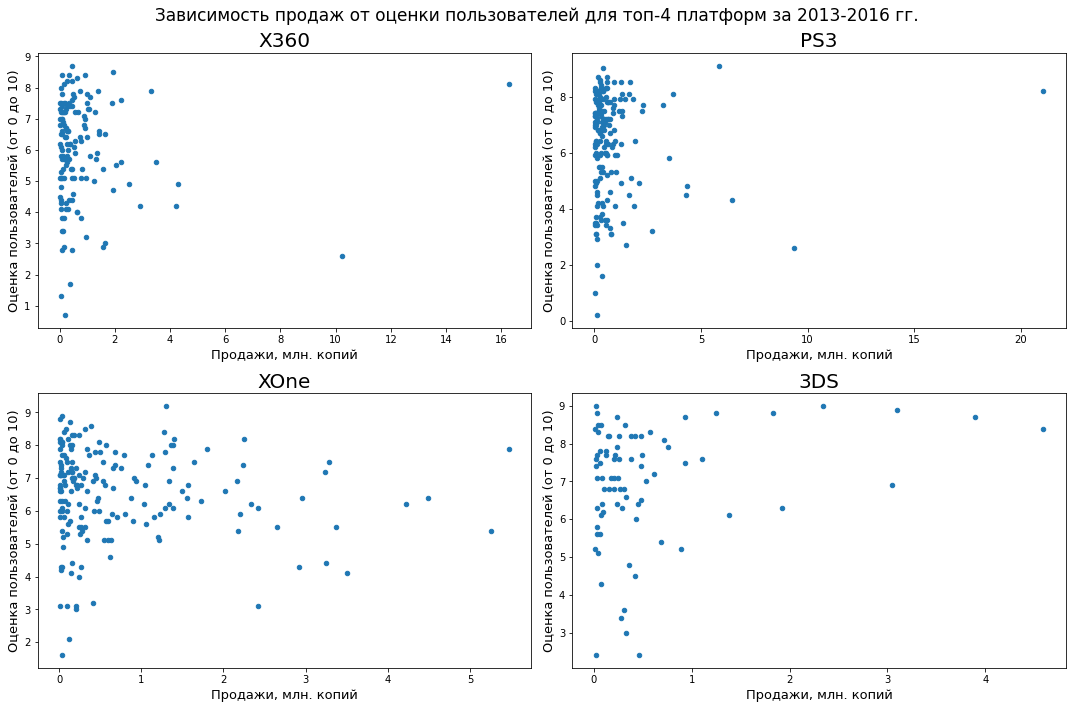

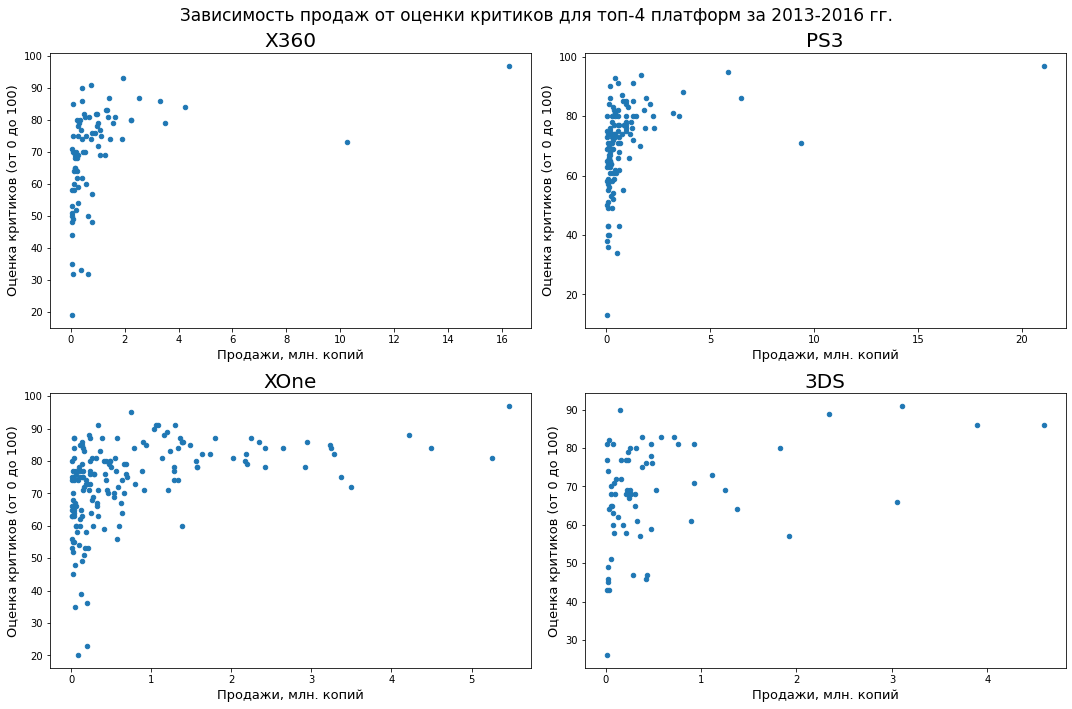

In [33]:
# Создаем список с оставшимися топ-4 платформами по продажам в период 2013-2016 гг., не включая PS4
platforms_top4_2013 = ['X360', 'PS3', 'XOne', '3DS']

# Построим диаграммы рассеяния по топ-4 платформам
# Зависимость продаж от оценки пользователей
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Зависимость продаж от оценки пользователей для топ-4 платформ за 2013-2016 гг.', fontsize=17) 
count = 0 # переменная-счетчик, для перебора платформ в списке через индекс
rows = len(platforms_top4_2013) // 2
cols = 2
count = 0 # переменная-счетчик, для перебора платформ в списке через индекс
for r in range(rows):
    for c in range(cols):
        index = platforms_top4_2013[count]
        df_grouped_users = data_query_2013[(data_query_2013['platform'] == index) & (data_query_2013['user_score'] != -1)].copy()
        ax = df_grouped_users.plot(kind = 'scatter', x = 'total_sales', y = 'user_score', ax=axes[r,c])
        ax.set_title(index, fontsize=20)
        ax.set_xlabel('Продажи, млн. копий', fontsize=13)
        ax.set_ylabel('Оценка пользователей (от 0 до 10)', fontsize=13)
        plt.tight_layout()
        count += 1

# Зависимость продаж от оценки критиков
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Зависимость продаж от оценки критиков для топ-4 платформ за 2013-2016 гг.', fontsize=17)
count = 0 # переменная-счетчик, для перебора платформ в списке через индекс
rows = len(platforms_top4_2013) // 2
cols = 2
for r in range(rows):
    for c in range(cols):
        index = platforms_top4_2013[count]
        df_grouped_critics = data_query_2013[(data_query_2013['platform'] == index) & (data_query_2013['critic_score'] != -1)].copy()
        ax = df_grouped_critics.plot(kind = 'scatter', x = 'total_sales', y = 'critic_score', ax=axes[r,c])
        ax.set_title(index, fontsize=20)
        ax.set_xlabel('Продажи, млн. копий', fontsize=13)
        ax.set_ylabel('Оценка критиков (от 0 до 100)', fontsize=13)
        plt.tight_layout()
        count += 1

plt.show();

In [35]:
#Рассчитаем коэффициенты корреляции между продажами и оценками пользователей и критиков

# Корреляция между оценкой пользователей и продажами
for platform in platforms_top4_2013:
    print('\n{0}:'.format(platform))
    for column in ['user_score']:
        query_users = data_query_2013.query('platform == @platform and (user_score != -1)')
        print('Коэффициент корреляции между оценкой пользователей и продажами: {0}'.format(round(query_users[column].corr(query_users['total_sales']), 3)))
    for column in ['critic_score']:
        query_critics = data_query_2013.query('platform == @platform and (critic_score != -1)')
        print('Коэффициент корреляции между оценкой критиков и продажами: {0}'.format(round(query_critics[column].corr(query_critics['total_sales']), 3)))


X360:
Коэффициент корреляции между оценкой пользователей и продажами: -0.012
Коэффициент корреляции между оценкой критиков и продажами: 0.35

PS3:
Коэффициент корреляции между оценкой пользователей и продажами: 0.002
Коэффициент корреляции между оценкой критиков и продажами: 0.334

XOne:
Коэффициент корреляции между оценкой пользователей и продажами: -0.069
Коэффициент корреляции между оценкой критиков и продажами: 0.417

3DS:
Коэффициент корреляции между оценкой пользователей и продажами: 0.242
Коэффициент корреляции между оценкой критиков и продажами: 0.357


Оценивая влияние отзывов пользователей/критиков на объем продаж по самой востребованной платформе (PS4) и остальным платфомам, входящим в топ-5 за 2013-2016 гг. можно определить следующие общие закономерности:
1. Коэффициент корреляции Пирсона между продажами и оценкой критиков варьируется от 0.334 (PS3) до 0.417 (XOne);
2. Коэффициент корреляции Пирсона между продажами и оценкой пользователей варьируется от -0.069 (XOne) до 0.24 (3DS).


Таким образом, наблюдается единая для всех платформ тенденция по формированию зависимости между объемами продажами и оценками пользователей/критиков:
* **слабая корреляция между оценками критиков и продажами;**
* **очень слабая корреляция между оценками пользователей и продажами.**

### Распределение игр по жанрам

Рассмотрим распределение релизов игр по жанрам, а также определим наиболее продаваемые жанры за период 2013-2016 годов.

,count,median,sum
genre,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


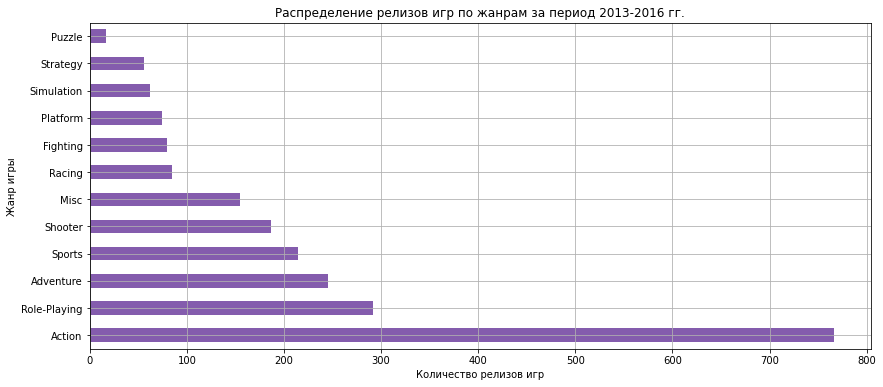

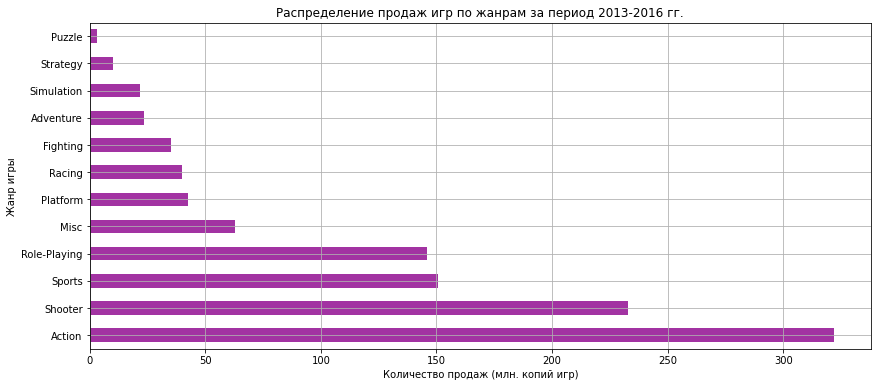

In [36]:
# Создаем сводную таблицу с количеством релизов, медианным и суммарным значением продаж
display(data_query_2013.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median', 'count')).sort_values(by='sum', ascending=False))

#Строим столбчатую диаграмму распределения количества выпущенных игр по жанрам за 2013-2016 гг.

(
data_query_2013
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
    .plot(y='name', kind='barh', color='rebeccapurple', title='Распределение релизов игр по жанрам за период 2013-2016 гг.', figsize=(14, 6), legend=False, alpha=0.8, grid=True, ylim=(2000, 8000))
)
plt.xlabel('Количество релизов игр')
plt.ylabel('Жанр игры')
plt.show();

# Построим столбчатую диаграмму распределения суммарных продаж по жанрам за 2013-2016 гг.
(
data_query_2013
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(y='total_sales', kind='barh', color='darkmagenta', title='Распределение продаж игр по жанрам за период 2013-2016 гг.', figsize=(14, 6), legend=False, alpha=0.8, grid=True, ylim=(2000, 8000))
)
plt.xlabel('Количество продаж (млн. копий игр)')
plt.ylabel('Жанр игры')
plt.show();

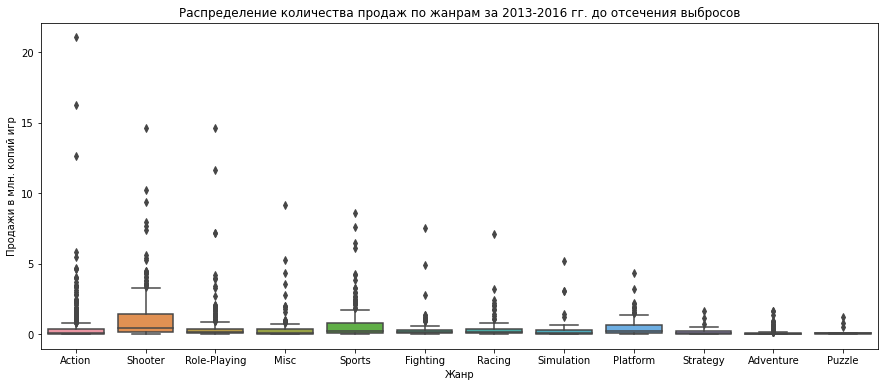

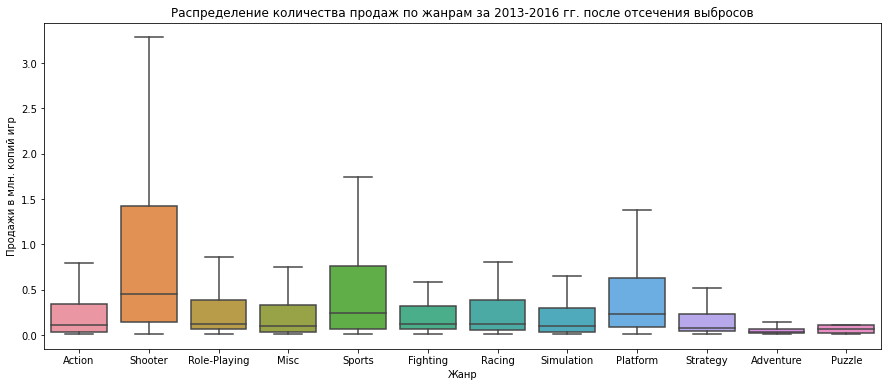

In [37]:
# Построим диаграммы размаха для анализа медианных значений продаж и диапазона нормальных значений по каждому жанру

#Ящик с усами до отсечения выбросов
plt.figure(figsize=(15, 6))
sns.boxplot(x = data_query_2013['genre'], y = data_query_2013['total_sales'])
plt.title('Распределение количества продаж по жанрам за 2013-2016 гг. до отсечения выбросов')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн. копий игр')
plt.show();

#Ящик с усами после отсечения выбросов
plt.figure(figsize=(15, 6))
sns.boxplot(x = data_query_2013['genre'], y = data_query_2013['total_sales'], showfliers=False)
plt.title('Распределение количества продаж по жанрам за 2013-2016 гг. после отсечения выбросов')
plt.xlabel('Жанр')
plt.ylabel('Продажи в млн. копий игр')
plt.show();

Наиболее популярным и продаваемым жанром в период 2013-2016 годов является **Action**. Рынок этого жанра охватывает 766 релизов на общую сумму более 321 млн. проданных копий. Далее ситуация с топ-3 лидерами жанров по объему релизов и продаж начинает варьироваться следующим образом:
- по количеству выпущенных игр преобладают *ролевые игры (Role-Playing - 292 релиза)* и *игры-приключения (Adventure - 245 релизов)*;
- по объему продаж выделяются *Shooter (233 млн. продаж)* и *Sports (151 млн. продаж)*.

Самым неприбыльным и маловыпускаемым жанром оказался жанр игры-головоломки (Puzzle) - всего 17 релизов с 3 млн. проданных копий. Такая статистика объясняется, с одной стороны, узким кругом игроков, заинтересованных в жанре головоломок, и, с другой стороны, небольшой востребованностью игрового продукта, разработанного для компьютеров. В современных реалиях жанр головоломок пользуется спросом в основном в качестве мобильных игр, и логично, что именно на телефонах головоломки  цепляют простотой восприятия, отсутствием глубокого сюжета и «времяубивательным» геймплеем.

Исходя из построенных диаграмм размаха можно говорить, что жанром с самой высокой медианой продаж за рассматриваемый период становится **Shooter**. Так, верхняя граница диапазона нормальных значений, характерных для этого жанра, находится на уровне 3.5 млн. продаж. Кроме того, Shooter имеет один из самых больших единичных выбросов в 15 млн. проданных копий игр, уступая в этом только жанру **Action** с несколькими крупными единичными выбросами - 16 и 20 млн. продаж. 

Примечательно, что между Shooter и остальными жанрами по медианным продажам сохраняется значительный разрыв, в том числе и с Action - жанром-лидером по количеству релизов и суммарному объему продаж. В данном контексте можем предположить, что игры в жанре Action лидируют по количеству продаж по причине присутствия на рынке некоторого набора крайне успешных игр-хитов. Данная версия подтверждается крайне скромным медианным значением и диапазоном нормальных значений продаж по этому жанру.

После Shooter в распределении медианных продаж следуют спортивные игры (Sports) и игры-платформеры (Platform) с распределением нормальных значений на уровне 1.7 и 1.5 млн. проданный копий, соответственно.

Таким образом наиболее перспективным жанром для развития в прогнозируемом периоде является **`Shooter`**. Наиболее прибыльный жанр - **`Action`**. Наименее прибыльный и неперспективный жанр - **`Puzzle`**.

## Портрет пользователя каждого региона (NA, EU, JP)

В целях выявления наиболее актуальных характеристик рыночного поведения пользователей из отдельных регионов, где осуществляется реализация компьютерных игр (в данном случае Северная Америка, Европа, Япония), ограничим выборку периодом 2013-2016 гг.

### Самые популярные платформы (топ-5) в регионах

In [38]:
# Группируем данные по продажам на топ-5 платформах для каждого региона за 2013-2016 гг.
na_platform = data_query_2013.groupby('platform')['na_sales'].agg(na_platform = 'sum').nlargest(5, 'na_platform').reset_index()
na_platform['share'] = round(((na_platform['na_platform']/(na_platform['na_platform'].sum()))*100), 2)
eu_platform = data_query_2013.groupby('platform')['eu_sales'].agg(eu_platform = 'sum').nlargest(5, 'eu_platform').reset_index()
eu_platform['share'] = round(((eu_platform['eu_platform']/(eu_platform['eu_platform'].sum()))*100), 2)
jp_platform = data_query_2013.groupby('platform')['jp_sales'].agg(jp_platform = 'sum').nlargest(5, 'jp_platform').reset_index()
jp_platform['share'] = round(((jp_platform['jp_platform']/(jp_platform['jp_platform'].sum()))*100), 2)

display(na_platform, eu_platform, jp_platform)

,platform,na_platform,share
0,PS4,108.74,28.23
1,XOne,93.12,24.17
2,X360,81.66,21.20
3,PS3,63.50,16.48
4,3DS,38.20,9.92


,platform,eu_platform,share
0,PS4,141.09,42.25
1,PS3,67.81,20.30
2,XOne,51.59,15.45
3,X360,42.52,12.73
4,3DS,30.96,9.27


,platform,jp_platform,share
0,3DS,67.81,49.64
1,PS3,23.35,17.09
2,PSV,18.59,13.61
3,PS4,15.96,11.68
4,WiiU,10.88,7.97


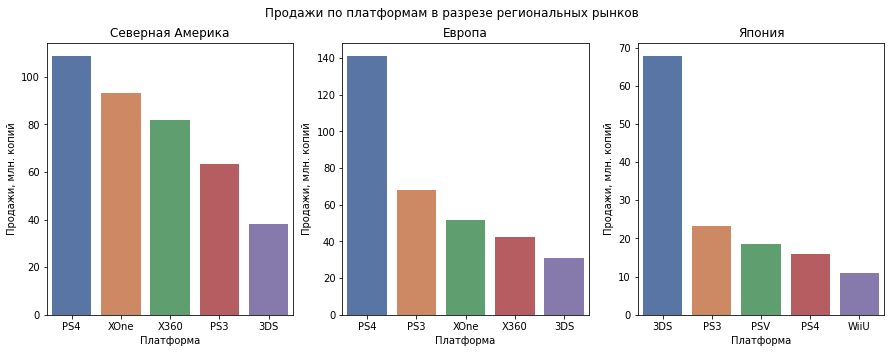

In [39]:
# Строим диаграммы распределения продаж по топ-5 платформам в разрезе регионов

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по платформам в разрезе региональных рынков')

# Северная Америка
sns.barplot(y = 'na_platform', x = 'platform', data = na_platform, ax=ax[0], palette='deep')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн. копий')
ax[0].set_xlabel('Платформа')

# Европа
sns.barplot(y = 'eu_platform', x = 'platform', data = eu_platform, ax=ax[1], palette='deep')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн. копий')
ax[1].set_xlabel('Платформа')

# Япония
sns.barplot(y = 'jp_platform', x = 'platform', data = jp_platform, ax=ax[2], palette='deep')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн. копий')
ax[2].set_xlabel('Платформа')
plt.show()
sns.reset_orig()

По диаграммам популярности платформ в разрезе регионов за период 2013-2016 годов можно заметить *кардинальные различия в предпочтениях пользователей из Японии в сравнении с Северной Америкой и Европой*. Так, если в Европе и Америке набор топ-5 платформ одинаковый и различается только долями, то в Японии приоритеты в выборе платформ выстроены совсем иначе.\
В Северной Америке и Европе прослеживается общемировая тенденция распределения продаж по платформам. Наиболее распространенной платформой в этих регионах является **`PS4`** (28% продаж в Америке и 42% продаж в Европе), в то время как японские пользователи отдают максимальное предпочтение платформе **`3DS`**, которая занимает половину всего японского рынка игровой индустрии.\
Примечательно, что PS4 в японском рейтинге находится только на 4 месте (всего 12% продаж), уступая первенство таким платформам, как PS3 и PSV. Наличие последней в топ-5 платформ Японии является характерной особенностью азиатского рынка игровой индустрии. То же самое касается присутствия WiiU в рейтинге популярных игровых платформ Японии.

### Самые популярные жанры (топ-5) в регионах

In [40]:
# Группировка данных топ-5 жанров по продажам в разрезе региональных рынков
na_genres = data_query_2013.groupby('genre')['na_sales'].agg(na_genres='sum').nlargest(5, 'na_genres').reset_index()
na_genres['share'] = round(((na_genres['na_genres']/(na_genres['na_genres'].sum()))*100), 2)
eu_genres = data_query_2013.groupby('genre')['eu_sales'].agg(eu_genres='sum').nlargest(5, 'eu_genres').reset_index()
eu_genres['share'] = round(((eu_genres['eu_genres']/(eu_genres['eu_genres'].sum()))*100), 2)
jp_genres = data_query_2013.groupby('genre')['jp_sales'].agg(jp_genres='sum').nlargest(5, 'jp_genres').reset_index()
jp_genres['share'] = round(((jp_genres['jp_genres']/(jp_genres['jp_genres'].sum()))*100), 2)
display(na_genres, eu_genres, jp_genres)

,genre,na_genres,share
0,Action,126.05,33.62
1,Shooter,109.74,29.27
2,Sports,65.27,17.41
3,Role-Playing,46.40,12.37
4,Misc,27.49,7.33


,genre,eu_genres,share
0,Action,118.13,36.50
1,Shooter,87.86,27.14
2,Sports,60.52,18.70
3,Role-Playing,36.97,11.42
4,Racing,20.19,6.24


,genre,jp_genres,share
0,Role-Playing,51.04,44.39
1,Action,40.49,35.21
2,Misc,9.20,8.00
3,Fighting,7.65,6.65
4,Shooter,6.61,5.75


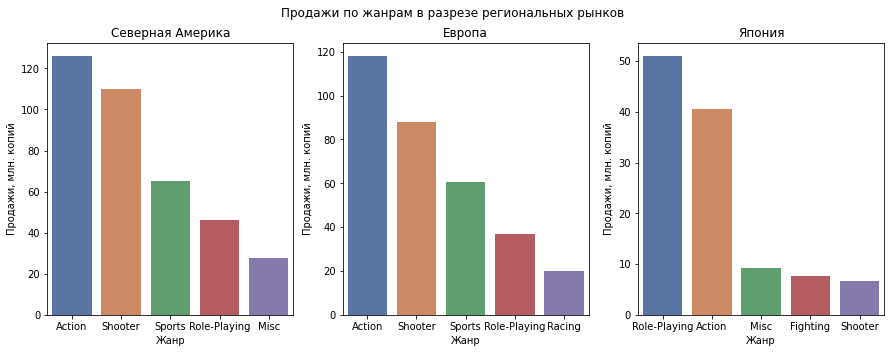

In [41]:
# Строим диаграммы распределения продаж по топ-5 жанрам в разрезе регионов

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по жанрам в разрезе региональных рынков')

# Северная Америка
sns.barplot(y = 'na_genres', x = 'genre', data = na_genres, ax=ax[0], palette='deep')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи, млн. копий')
ax[0].set_xlabel('Жанр')

# Европа
sns.barplot(y = 'eu_genres', x = 'genre', data = eu_genres, ax=ax[1], palette='deep')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи, млн. копий')
ax[1].set_xlabel('Жанр')

# Япония
sns.barplot(y = 'jp_genres', x = 'genre', data = jp_genres, ax=ax[2], palette='deep')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи, млн. копий')
ax[2].set_xlabel('Жанр')
plt.show()
sns.reset_orig()

По диаграммам популярности жанров в разрезе регионов за период 2013-2016 годов можно выявить следующие закономерности:
1. В перечень топ-5 жанров по объёму продаж во всех анализируемых регионах входят **Action, Shooter, Role-Playing**.
2. Жанр **`Action`** лидируют в Северной Америке (34% продаж) и Европе (36.5% продаж), в то время как на японском рынке почти половина продаж приходится на жанр **`Role-Playing`** (44.4% продаж).
3. Распределения жанровых предпочтений у пользователей Северной Америки и Европы совпадают по первым 4-м местам (Action, Shooter, Sports, Role-Playing).
4. Региональная специфика в выборе жанров: Fighting в Японии (7% продаж) и Racing в Европе (6.2% продаж).

### Влияние рейтинга ESRB на продажи в отдельном регионе

Теперь исследуем распределение региональных продаж компьютерных игр в зависимости от выставления той или иной оценки ассоциацией ESRB.

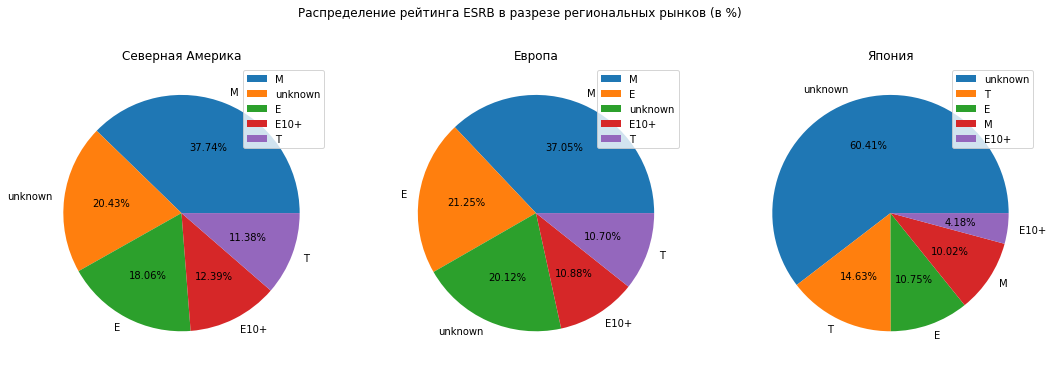

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [42]:
#Построим круговые диаграммы распределения продаж по рейтингу ESRB в разрезе регионов

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Распределение рейтинга ESRB в разрезе региональных рынков (в %)')

# Северная Америка
na_rating = data_query_2013.pivot_table(index='rating',values='na_sales',aggfunc='sum')\
.sort_values('na_sales', ascending = False)
na_rating.plot(kind = 'pie', y='na_sales', ax=ax[0], label = '', autopct='%1.2f%%')
ax[0].set_title('Северная Америка')

# Европа
eu_rating = data_query_2013.pivot_table(index='rating',values='eu_sales',aggfunc='sum')\
.sort_values('eu_sales', ascending = False)
eu_rating.plot(kind = 'pie', y='eu_sales', ax=ax[1], label = '', autopct='%1.2f%%')
ax[1].set_title('Европа')

# Япония
jp_rating = data_query_2013.pivot_table(index='rating',values='jp_sales',aggfunc='sum')\
.sort_values('jp_sales', ascending = False)
jp_rating.plot(kind = 'pie', y='jp_sales', ax=ax[2], label = '', autopct='%1.2f%%')
ax[2].set_title('Япония')
plt.show()

display(na_rating, eu_rating, jp_rating)

Распределение рейтинга ESRB в Северной Америке и в Европе имеют схожую структуру. Около трети всех оцененных игр относятся к категории "M"(«Для взрослых»),  21% - к категории "Е" («Для всех») и оставшуюся часть делят поровну категории "Т"("Подросткам") и "E10+" («Для всех от 10 лет и старше»).\
Распределение рейтинга ESRB в Японии с учетом особенностей азиатского рынка существенно отличается от западных реалий. Так, лидером распределения по имеющимся оценкам является категория игр для подростков (T) - 15% продаж продуктов всего японского рейтинга. Далее следуют  категории "Е" («Для всех») и "M"(«Для взрослых») - по 10% каждой.\
Следует учесть, что **в японском рейтинге категория отсутствует у 60% выпущенных игр**. Вероятно, это связано с активной деятельностью и приоритетности японской рейтинговой организации (Computer Entertainment Rating Organization), которая проводит собственные исследования компьютерных игр и программного обеспечения для использования на внутреннем рынке. Об этом свидетельствуют очень скромные абсолютные значения продаж игр, имеющих категорию в рейтинге ESRB. Таким образом, выборка данных по Японии не является сбалансированной в сравнении с рейтингованием Северной Америки и Европы.

**Выводы о портрете пользователя каждого региона**

1. *Пользователь из Северной Америки* - приверженец игровых жанров Action и Shooter, предпочитает игры возрастной категории для взрослых (M) и выбирает игровую платформу, как правило, между PlayStation4 и XOne от Microsoft.
2. *Пользователь из Европы* - ценитель игрового жанра Action, но периодически отвлекается на Shooter и Sports. Однозначно выбирает для себя PlayStation4 и предпочитает игровой контент для взрослых (M).
3. *Пользователь из Японии* - уникальный экземпляр на рынке компьютерных игр, который не стремится следовать общемировым тенденциям и задает свои игровые тренды. Японский пользователь ценит жанр ролевых игр (Role-Playing), иногда отвлекаясь на популярный среди остального мира Action. Основная возрастная категория игр, имеющих рейтинг ESRB, - игры для подростков (Т). В качестве игровой консоли каждый второй пользователь из Японии выбирает 3DS от Nintendo.

## Проверка гипотез

В данном блоке исследуем ряд гипотез, поставленных перед нашей командой аналитики.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

*Нулевая гипотеза (H0):* Средние пользовательские рейтинги платформ Xbox One и PC равны.\
*Альтернативная гипотеза (Н1):* Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Задача заключается в сравнении средних значений оценок пользователей в разрезе платформ Xbox One и PC.\
В данном случае используем **t-критерий Стьюдента** для подтверждения гипотезы о равенстве средних двух генеральных совокупностей, так как:
- генеральные совокупности (выборки) независимы друг от друга;
- выборочные средние распределены нормально (близко к нормальному вокруг истинного среднего).

Пороговое значение уровня статистической значимости (**p-value**) определим на уровне 5%.

In [43]:
# Создаем 2 выборки по платформам XOne и PC, исключив заданный условный маркер '-1'
xone = data_query_2013[(data_query_2013['platform'] == 'XOne') & (data_query_2013['user_score'] != -1)]['user_score']
pc = data_query_2013[(data_query_2013['platform'] == 'PC') & (data_query_2013['user_score'] != -1)]['user_score']

alpha = 0.05 #уровень статистической значимости

# Альтернативная гипотеза является двухсторонней
results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue) # расчет p-value

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [44]:
# Контрольная проверка срадних пользовательских рейтингов платформ XOne и PC
print('Средняя оценка пользователей игр для платформы Xbox One:', round(xone.mean(),2))
print('Средняя оценка пользователей игр для платформы PC:', round(pc.mean(),2))

Средняя оценка пользователей игр для платформы Xbox One: 6.52
Средняя оценка пользователей игр для платформы PC: 6.27


**Вывод:** По результатам t-теста нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action  и Sports разные?

*Нулевая гипотеза (H0):* Средние пользовательские рейтинги жанров Action и Sports равны.\
*Альтернативная гипотеза (Н1):* Средние пользовательские рейтинги жанров Action и Sports не равны.

Задача заключается в сравнении средних значений оценок пользователей в разрезе жанров Action и Sports.\
В данном случае используем **t-критерий Стьюдента** для подтверждения гипотезы о равенстве средних двух генеральных совокупностей, так как:
- генеральные совокупности (выборки) независимы друг от друга;
- выборочные средние распределены нормально (близко к нормальному вокруг истинного среднего).

Пороговое значение уровня статистической значимости (**p-value**) определим на уровне 5%.

In [45]:
# Создаем 2 выборки по жанрам Action и Sports, исключив заданный условный маркер '-1'
action = data_query_2013[(data_query_2013['genre'] == 'Action') & (data_query_2013['user_score'] != -1)]['user_score']
sports = data_query_2013[(data_query_2013['genre'] == 'Sports') & (data_query_2013['user_score'] != -1)]['user_score']

alpha = 0.05 #уровень статистической значимости

# Альтернативная гипотеза является двухсторонней
results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue) # расчет p-value

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [46]:
# Контрольная проверка срадних пользовательских рейтингов жанров Action и Sports
print('Средняя оценка пользователей игр для жанра Action:', round(action.mean(),2))
print('Средняя оценка пользователей игр для жанра Sports:', round(sports.mean(),2))

Средняя оценка пользователей игр для жанра Action: 6.84
Средняя оценка пользователей игр для жанра Sports: 5.24


**Вывод:** По результатам t-теста  отвергаем нулевую гипотезу. Таким образом, подтверждается альтернативная гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод исследования

В ходе выполнения проекта был проведен анализ исторических данных, содержащих сведения о продажах компьютерных игр, принадлежность к жанрам и платформам с учетом оценок пользователей, критиков и независимых экспертов за период с 1980 по 2016 годы.\
Исследование проводилось по следующим этапам:
1. **Загрузка данных**: данные загружены корректно. Исходный датафрейм содержит информацию по 16715 компьютерным играм, каждая из которых описывается 11 признаками (6 количественных, 4 категориальных и 1 временной).

2. **Предобработка данных**:
* обработаны пропуски, скорректированы типы данных, обработаны неявные дубликаты;
* скорректированы устаревшие обозначения категорий игр по по рейтингу ассоциации ESRB;
* сформирован датафрейм с "чистыми" данными, содержащий 16443 строк.
3. **Исследовательский анализ данных**

Выявлены следующие закономерности на рынке игровой индустрии:
- основной пик выпускаемых игровых продуктов за весь период приходится на 2008-2009 годы (более 1400 игр за каждый год), после чего фиксируется отрицательная динамика как по выпуску игр, так и в разрезе продаж;
- средний жизненный цикл платформ ограничивается периодом **7 лет**;
- наиболее прибыльные и перспективные платформы по состоянию на 2016 год: **PS4 и XOne**;
- наиболее прибыльный жанр - **Action**, наиболее перспективный жанр для анализа в прогнозируемом периоде - **Shooter**.

Установлено, что **продажи в целом не зависят от оценок критиков и пользователей**. Так, зафиксирована слабая корреляция между продажами и оценками критиков и очень слабая корреляция между продажами и оценками пользователей.

4. **Портрет пользователя каждого региона**\
Выявлены следующие региональные особенности типичного пользователя компьютерных игр:
* *Пользователь из Северной Америки* - приверженец игровых жанров Action и Shooter, предпочитает игры возрастной категории для взрослых (M) и выбирает игровую консоль между PlayStation4 и XOne от Microsoft.
* *Пользователь из Европы* - ценитель игрового жанра Action, но периодически отвлекается на Shooter и Sports. Однозначно выбирает для себя PlayStation4 и предпочитает игровой контент для взрослых (M).
* *Пользователь из Японии* - уникальный экземпляр на рынке компьютерных игр, который не стремится следовать общемировым тенденциям и задает собственные игровые тренды. Японский пользователь ценит жанр ролевых игр (Role-Playing), иногда отвлекаясь на популярный среди остального мира Action. Основная возрастная категория игр, имеющих рейтинг ESRB, - игры для подростков (Т). В качестве игровой консоли каждый второй пользователь из Японии выбирает 3DS от Nintendo.
5. **Проверка гипотез**\
По завершении аналитической работы проверены и подтверждены следующие гипотезы:
- средние пользовательские оценки платформ Xbox One и PC одинаковы;
- средние оценки пользователей для жанров Action и Sports разные.